# O FEA.dev e o Busca Bloco 👩‍💻🎉
O [FEA.dev](https://github.com/fea-dev-usp) é uma entidade estudantil da USP que tem como objetivo conectar os estudantes à intersecção entre o mundo dos negócios e o universo da programação. Já o  [Busca Bloco](https://www.buscabloco.com.br/)  é uma iniciativa que visa ajudar as pessoas a planejarem a sua folia através de um painel interativo do Power BI que contém todos os desfiles de blocos oficiais do Rio de Janeiro e de São Paulo mapeados por data, região e estilo musical!

---

## Overview 
 Esse projeto consiste em uma ***análise de dados sobre bloquinhos de Carnaval na cidade de São Paulo em 2024 utilizando Python***. Os dados foram disponibilizadas ao FEA.dev pela equipe do Busca Bloco, de modo que, no total, foram analisados 464 bloquinhos.


## Dados
Os dados utilizados são referentes aos bloquinhos oficiais de São Paulo em 2024 e podem ser visualizados no [Power BI do Busca Bloco](https://app.powerbi.com/view?r=eyJrIjoiMzVjZjEzNDEtOGNhOC00ZTU3LWJjZTUtYmExODQ4ZDhlNThhIiwidCI6IjA4NzllN2Q3LTQ4ZWQtNDE2My1hM2M5LWRjNDJhMTUwZDE0YyJ9). Caso queira ter acesso a base de dados para a realização de projetos, entre em contato com as responsáveis pela iniciativa por meio de seu [site](https://www.buscabloco.com.br/) ou de seu [Instagram](https://www.instagram.com/buscabloco?igsh=OG93ZW95dHk3cGVo).

Basicamente, a base consiste em uma tabela de 464 linhas e 11 colunas com as seguintes características e variáveis:
* **Nome do Bloco:** coluna com dados do tipo ```object``` que corresponde ao nome do bloquinho;
* **Zona:**  coluna com dados do tipo ```object``` que corresponde à zona da cidade de Sâo Paulo em que o cloquinho está localizado;
* **Itinerário:**  coluna com dados do tipo ```object``` que corresponde ao itinerário do bloquinho;
* **Estilo Musical:** coluna com dados do tipo ```object``` que corresponde ao estilo musical predominante do bloquinho;
* **Cidade:**  coluna com dados do tipo ```object``` que corresponde à cidade em que o bloquinho está localizado;
* **Latitude:** coluna com dados do tipo ```object``` que corresponde a latitude do local em que o bloquinho irá começar;
* **Longitude:** coluna com dados do tipo ```object``` que corresponde a longitude do local em que o bloquinho irá começar;
* **Data:** coluna com dados do tipo ```datetime64[ns]``` que corresponde ao dia em que o bloquinho irá ocorrer;
* **Dia:** coluna com dados do tipo ```object``` que corresponde ao dia da semana em que o bloquinho irá ocorrer;
* **Hora:** coluna com dados do tipo ```object``` que corresponde ao horário de início do bloquinho.

[Clique aqui para visualizar o Power BI completo do Busca Bloco 👇](https://app.powerbi.com/view?r=eyJrIjoiMzVjZjEzNDEtOGNhOC00ZTU3LWJjZTUtYmExODQ4ZDhlNThhIiwidCI6IjA4NzllN2Q3LTQ4ZWQtNDE2My1hM2M5LWRjNDJhMTUwZDE0YyJ9)
![Capa do BI](https://github.com/LaQuokka/Analise_BuscaBloco/assets/122839919/52eb53f7-baef-4191-b45a-2d5f48768ffe)

Para desenvolver as análises e elaborar os gráficos, utilizou-se as seguintes bibliotecas:


In [71]:
# -*- coding: utf-8 -*-
"""
Created on Fri Feb  9 21:10:10 2024

@author: CINTHYA BENEDUCCI
"""
## Importação de bibliotecas
# Extração de dados
import os

# Manipulação de dados
import pandas as pd
import json # criação dos mapas
import random # randomizar as cores nos mapas
import datetime
import numpy as np

# Visualização de daods
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap # criação da escala de cores
from matplotlib.ticker import FuncFormatter # customização de eixo y dos gráficos
import folium # criação dos mapas
import seaborn as sns # design dos gráficos
import plotly.express as px # paletas de cor customizadas

Além disso, foram feitas algumas definições de antemão:


In [72]:
## Definições iniciais
amarelo_dev = '#FFE144'

# Configurando o estilo dos gráficos
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-light.mplstyle')

# Criando paleta de cores
yellow = (1, 1, 0)  # amarelo
gray = (0.5, 0.5, 0.5)  # cinza
colors = [yellow, gray]
cmap_name = 'yellow_gray'
n_bins = 1000  # Número de cores na paleta
cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)

# Definição de funções
def bar_plot(eixo_x:pd.Series, eixo_y: pd.Series, cor:str, x_label:str, y_label:str, titulo:str):
    plt.figure(figsize = (8,4))
    plt.bar(eixo_x, eixo_y, color = cor)
    plt.title(titulo)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.tight_layout()
    plt.tick_params(axis='x', direction='in')
    
    
def pie_plot(labels, sizes, colors, title):
    plt.figure(figsize=(5, 5))
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
    plt.title(title)
    plt.tight_layout()
    plt.axis('equal')
 
   
plt.rcParams['grid.linestyle'] = '--'
plt.rcParams['font.family'] = 'Consolas'
sns.set_style("whitegrid", {'grid.linestyle': '--', 'font.family': 'Consolas'})

In [73]:
## Leitura da database
os.chdir(r'C:\Users\USUARIO\Desktop\Cinthya\python_codes\BuscaBloco\Analise_BuscaBloco')
path = os.getcwd()
file2read = path + r'\db_blocos_completa.xlsx'
db = pd.read_excel(file2read, sheet_name = 'db_completa')
db.drop("Tipo", axis = 1, inplace = True) # retirando coluna sem variação e que não contribui para a análise

# Retirando observações com #N/A
quant_linhas = db.shape[0]
db.dropna(inplace = True)
print(f'Foram retiradas {quant_linhas - db.shape[0]} linhas com NA.')

# Fazendo alguns tratamentos adicionais
db.replace({'Centro-Sul':'Centro-sul'}, inplace = True)
dic_dias = {'Sunday':'Domingo',
            'Saturday': 'Sábado',
            'Monday':'Segunda',
            'Tuesday':'Terça',
            'Wednesday':'Quarta',
            'Thursday':'Quinta',
            'Friday':'Sexta'}
db.replace(dic_dias, inplace = True)
db.iloc[:,[5,6]] = db.iloc[:,[5,6]].replace({",": "."}, regex = True)
db.head()



Foram retiradas 246 linhas com NA.


,Nome do Bloco,Zona,Itinerário,Estilo Musical,Cidade,Latitude,Longitude,Data,Dia,Hora
1,Bloco Banda do Ari,Centro-sul,Al. dos Ubiatans (Beco da Cultura até Av. Pias...,Samba,São Paulo,-23.626267406288143,-46.6451235360053,2024-02-03,Sábado,12:00:00
2,Broco da Burocra,Centro,"Al. Eduardo Prado 499 - Campos Elíseos, Al. Ba...",Brasilidades,São Paulo,-23.530792404429068,-46.649700358775554,2024-02-03,Sábado,09:00:00
3,Bloco de Pífanos de São Paulo,Centro-sul,"Al. Guaicanans, 519, Av. Itacira, R. dos Indíg...",Brasilidades,São Paulo,-23.61529270208409,-46.64857071966193,2024-02-04,Domingo,10:00:00
4,Bloco Malandragem,Oeste,"Al. Olga - Barra Funda, R. Margarida, R. Marta...",Tributo,São Paulo,-23.529504424617738,-46.66337072370416,2024-02-18,Domingo,10:00:00
5,Bloco Agora Vai,Centro,"Alameda Barão de Limeira, 704 até 1525.",Fanfarra,São Paulo,-23.534911445317952,-46.64702777115604,2024-02-13,Terça,14:00:00


*Obs.: cabe ressaltar que a coluna “Hora” se refere à hora de início dos bloquinhos e a coluna "Estilo musical" diz respeito ao estilo musical predominante.*


Como sabemos que em época de carnaval os bloquinhos rolam o mês inteiro - e não só durante o feriado oficial - o primeiro passo foi adicionar uma coluna “carnaval” que permita analisar os bloquinhos em três períodos cronológicos distintos: o pré-carnaval, o carnaval e o pós-carnaval. Considerou-se como o período de carnaval os dias 10 a 14 de fevereiro, como pré-carnaval o período anterior ao dia 10/fev e como pós-carnaval o período posterior a 14/fev.


In [74]:
# Considerando como período de carnaval os dias 10 a 14 de fevereiro
db.loc[db['Data'].dt.day.isin([10, 11, 12, 13, 14]), 'carnaval'] = 'Carnaval'
db.loc[db['Data'].dt.day < 10, 'carnaval'] = 'Pré-Carnaval'
db.loc[db['Data'].dt.day > 14, 'carnaval'] = 'Pós-Carnaval'

Agora, vamos ver como os bloquinhos estão distribuídos ao longo desses três períodos fazendo uma filtragem simples a partir da nossa coluna recém-criada:

Text(0, 0.5, 'Quantidade de Bloquinhos (%)')

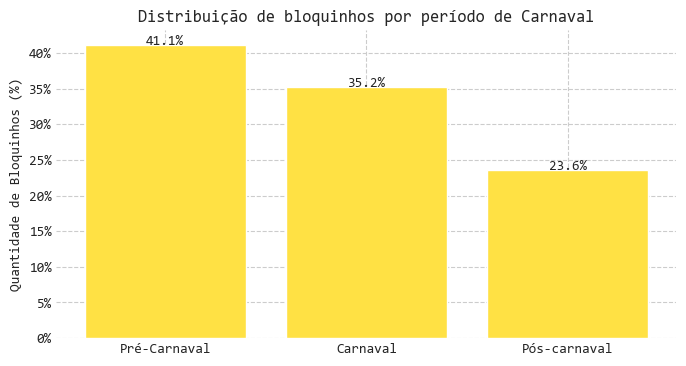

In [75]:
### Distribuição dos bloquinhos por período de Carnaval
## Avaliando os dados
# Avaliando a quantidade de bloquinhos em cada período
bloquinhosFeriado = db[db['carnaval']=='Carnaval']['Dia'].value_counts().sum()
bloquinhosPre = db[db['carnaval']=='Pré-Carnaval']['Dia'].value_counts().sum()
bloquinhosPos = db[db['carnaval']=='Pós-Carnaval']['Dia'].value_counts().sum()

# Montando um dataframe com as estatísticas de cada período
bloquinhos_diaMes = pd.DataFrame([bloquinhosPre,bloquinhosFeriado, bloquinhosPos], index = ['Pré-Carnaval',
'Carnaval',
'Pós-carnaval'])
bloquinhos_diaMes.reset_index(inplace = True)
bloquinhos_diaMes.columns = ['Categoria', 'Quantidade']
bloquinhos_diaMes['pct'] = bloquinhos_diaMes['Quantidade'].div(bloquinhos_diaMes['Quantidade'].sum())

## Plot
plt.figure(figsize=(8, 4))  
plt.bar(bloquinhos_diaMes['Categoria'], bloquinhos_diaMes['pct'], color=amarelo_dev)

# Adicionando os rótulos nas barras do gráfico
for x,y in enumerate(bloquinhos_diaMes['pct']):
    plt.annotate("{:.1%}".format(y), xy=(x, y), ha = 'center')

# Formatando o eixo y como %
def formatacao_pct(x, pos): # Definindo função para reutilizar o código nos próximos gráficos :)
    return '{:.0%}'.format(x)
plt.gca().yaxis.set_major_formatter(FuncFormatter(formatacao_pct))

plt.title('Distribuição de bloquinhos por período de Carnaval')
plt.ylabel('Quantidade de Bloquinhos (%)')


Vemos que mais de metade dos bloquinhos não acontece durante o carnaval 😯! Apenas 34.9% dos bloquinhos se dão durante o carnaval em si. Dos outros 65.1% do total de bloquinhos, 40.9% são de pré-carnaval (e o perigo de queimar largada? 🫣). Por outro lado, a boa notícia é que 24.1% dos bloquinhos se dão depois do feriado, o que significa que mesmo depois da quarta-feira de cinzas ainda tem coisa pra curtir!




E qual é a zona da cidade de São Paulo onde acontecem mais bloquinhos? Essa é moleza! Vamos aplicar um ```.value_counts``` na coluna “Zona” e plotar um gráfico de pizza.


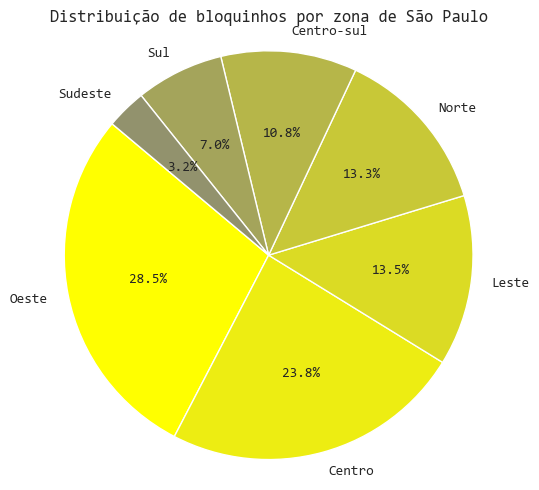

In [76]:
### Distribuição de bloquinhos por zona da cidade
## Avaliando os dados
bloquinhosZona = pd.DataFrame(db['Zona'].value_counts()).rename({'count':'Quantidade'}, axis = 1)                                              
bloquinhosZona.reset_index(inplace = True)

## Plot
labels = bloquinhosZona['Zona']
sizes = bloquinhosZona['Quantidade']
title = 'Distribuição de bloquinhos por zona de São Paulo'
pie_plot(labels, sizes, [cm(i/len(labels)) for i in range(len(labels))], title)
plt.show()

Pelo visto, as zonas oeste, centro e leste, respectivamente, lideram o ranking de zonas mais animadas para o carnaval! Mas será que isso é verdade em todos os períodos do carnaval? 

Para responder essa pergunta, vamos juntar as duas análises anteriores: para cada zona, em qual período - pré, durante ou pós-carnaval - mais acontecem os bloquinhos?


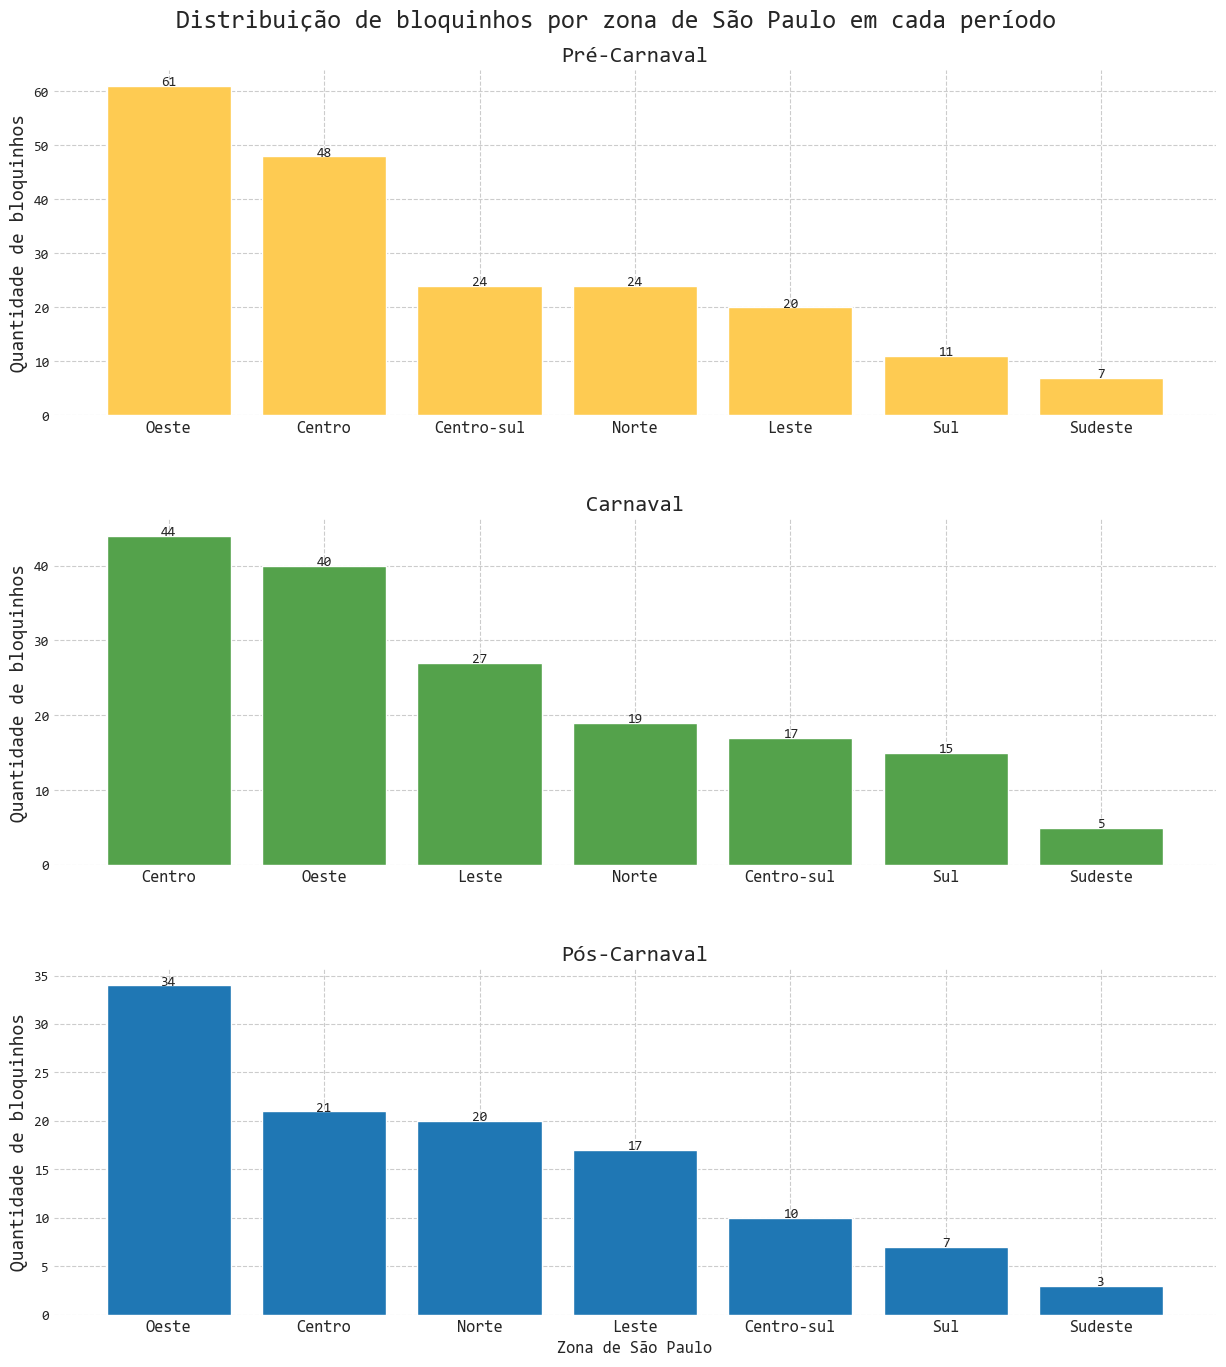

In [77]:
### Quantidade de bloquinhos em cada período por zona de São Paulo

periodos_carnaval = ['Pré-Carnaval', 'Carnaval', 'Pós-Carnaval']

i = -1
fig, axs = plt.subplots(3,1, figsize = (15,15))
cor_pre_carnaval =px.colors.qualitative.Plotly[9]
cor_carnaval = px.colors.qualitative.T10[4]
cor_pos_carnaval = px.colors.qualitative.D3[0]
cores = [cor_pre_carnaval, cor_carnaval, cor_pos_carnaval]
fig.suptitle('Distribuição de bloquinhos por zona de São Paulo em cada período', fontsize = 18)


for momento in periodos_carnaval:
    # Avaliação dos dados
    i += 1
    zonaMomento = pd.DataFrame(db[db['carnaval']==momento]['Zona'].value_counts())
    zonaMomento.reset_index(inplace = True)
    zonaMomento.columns = ['Zona', 'Quantidade']
    # Plot
    y = zonaMomento['Quantidade']
    x = zonaMomento['Zona']
    
    axs[i].bar(x, y, color = cores[i])
    axs[i].set_title(momento, fontsize=16)
    
    axs[i].set_ylabel('Quantidade de bloquinhos', fontsize=14)
    axs[i].tick_params(axis='x', direction='in', labelsize=12)

    for x,y in enumerate(zonaMomento['Quantidade']):
        axs[i].annotate(y, xy = (x,y), ha = 'center')
    
    
   
plt.subplots_adjust(top = 0.94, # ajuste para o título da figura não ficar muito longe dos subplots
                    hspace=0.3) # ajuste para ter espaço suficiente entre os subplots)
axs[i].set_xlabel('Zona de São Paulo', fontsize=12)
plt.show()


Pelo que parece, as zonas oeste e centro realmente dominam o carnaval em todos os períodos, mas a posição de 3º lugar varia entre as zonas centr-sul, leste e norte :)

O próximo passo será descobrir quais dias da semana mais tiveram bloquinhos agendados! Para isso, novamente, iremos utilizar um ```.value_counts()``` na coluna "Dia".

Text(0, 0.5, 'Quantidade de Bloquinhos')

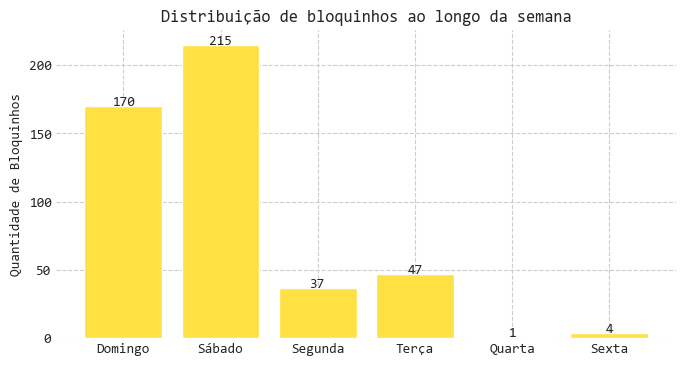

In [78]:

### Distribuição dos Bloquinhos ao longo dos dias da semana
## Avaliando os dados
# Computando a quantidade de bloquinhos por dia da semana através da coluna "Dia"
bloquinhosDia = db['Dia'].value_counts().reset_index()
# Transformando essa quantidade de bloquinhos em %
bloquinhosDia['pct'] = bloquinhosDia['count'].div(bloquinhosDia['count'].sum())

# Vamos transformar a coluna de dias da semana em uma coluna categórica, para que possamos ordená-la da forma adequada
bloquinhosDia.Dia = pd.Categorical(bloquinhosDia.Dia, categories=list(dic_dias.values()),
                                    ordered = True)
bloquinhosDia.sort_values('Dia', inplace = True)

## Plot
plt.figure(figsize=(8, 4))  
plt.bar(bloquinhosDia['Dia'], bloquinhosDia['count'], color=amarelo_dev)
# Adicionando os rótulos nas barras
for x,y in enumerate(bloquinhosDia['count']):
    plt.annotate(y, xy=(x, y), ha = 'center')

plt.title('Distribuição de bloquinhos ao longo da semana')
plt.ylabel('Quantidade de Bloquinhos')


Como já era de se esperar, 377 dos 464 (81%) bloquinhos que analisamos tem data marcada no final de semana. Será que essa distribuição muda muito quando nós controlamos pelo período do carnaval? Afinal, fora do carnaval "oficial", é difícil sair para a folia durante semana.


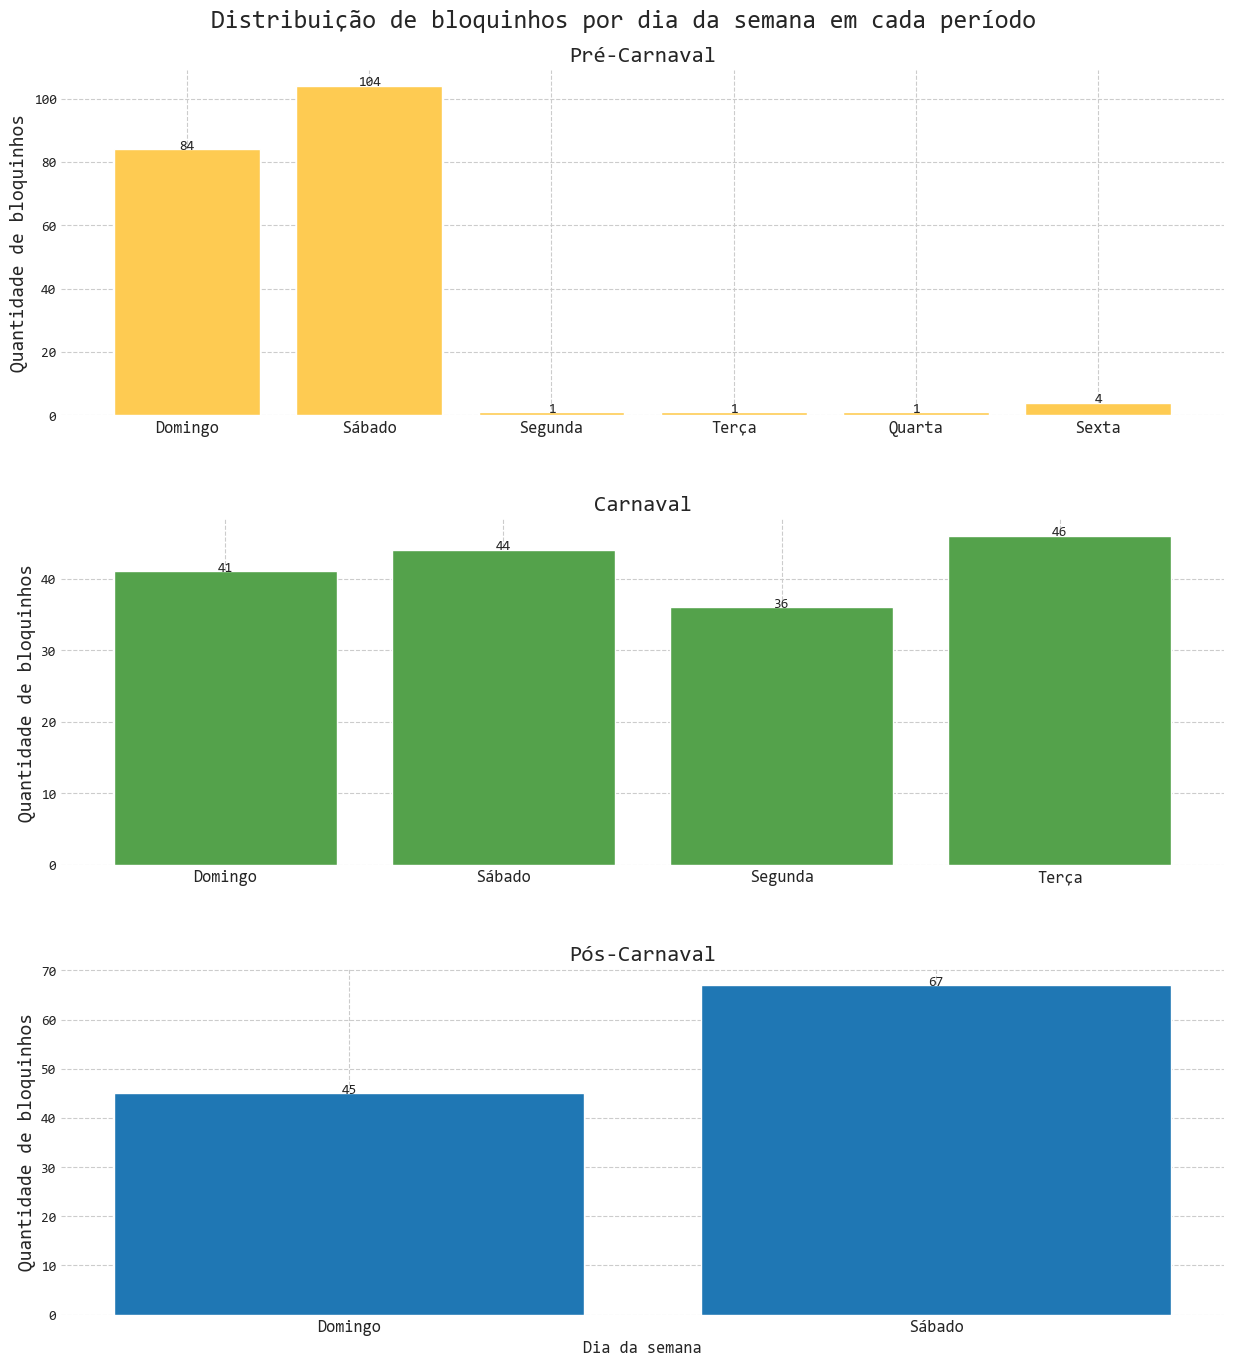

In [79]:
### Quantidade de bloquinhos em cada dia da semana por período do carnaval
## Avaliando os dados    
# Ordenando o dataframe segundo pré, carnaval e pós para o plot ser feito nessa ordem
periodos_carnaval = ['Pré-Carnaval', 'Carnaval', 'Pós-Carnaval']

i = -1
fig, axs = plt.subplots(3,1, figsize = (15,15))
cor_pre_carnaval =px.colors.qualitative.Plotly[9]
cor_carnaval = px.colors.qualitative.T10[4]
cor_pos_carnaval = px.colors.qualitative.D3[0]
cores = [cor_pre_carnaval, cor_carnaval, cor_pos_carnaval]
fig.suptitle('Distribuição de bloquinhos por dia da semana em cada período', fontsize = 18)


for momento in periodos_carnaval:
    # Avaliação dos dados
    i += 1
    # Computando a quantidade de bloquinhos por dia da semana através da coluna "Dia"
    bloquinhosDia = db[db['carnaval']==momento]['Dia'].value_counts().reset_index()
    # Transformando essa quantidade de bloquinhos em %
    bloquinhosDia['pct'] = bloquinhosDia['count'].div(bloquinhosDia['count'].sum())

    # Vamos transformar a coluna de dias da semana em uma coluna categórica, para que possamos ordená-la da forma adequada
    bloquinhosDia.Dia = pd.Categorical(bloquinhosDia.Dia, categories=list(dic_dias.values()),
                                        ordered = True)
    bloquinhosDia.sort_values('Dia', inplace = True)
    bloquinhosDia.rename({'count':'Quantidade'}, axis = 1, inplace = True)

    # Plot
    y = bloquinhosDia['Quantidade']
    x = bloquinhosDia['Dia']
    
    axs[i].bar(x, y, color = cores[i])
    axs[i].set_title(momento, fontsize=16)
    
    axs[i].set_ylabel('Quantidade de bloquinhos', fontsize=14)
    axs[i].tick_params(axis='x', direction='in', labelsize=12)
    
    for x,y in enumerate(bloquinhosDia['Quantidade']):
        axs[i].annotate(y, xy = (x,y), ha = 'center')

   
plt.subplots_adjust(top = 0.94, # ajuste para o título da figura não ficar muito longe dos subplots
                    hspace=0.3) # ajuste para ter espaço suficiente entre os subplots)
axs[i].set_xlabel('Dia da semana', fontsize=12)
plt.show()


Aha! De fato, bloquinhos durante a semana estão concentrados durante o período oficial. Há registros de alguns bloquinhos pontuais durante semana no pré-carnaval, mas no pré e no pós praticamente todos os bloquinhos estão marcados em finais de semana.

E será que o horário médio de início dos bloquinhos varia muito a depender do dia da semana? Para fazer essa análise, vamos criar uma coluna chamada "Horário em segundos" a partir da conversão dos dados datetime da coluna "Hora" para segundos. Assim, podemos calcular o horário médio e posteriormente reconvertê-lo para o formato usual, de hh:mm:ss.

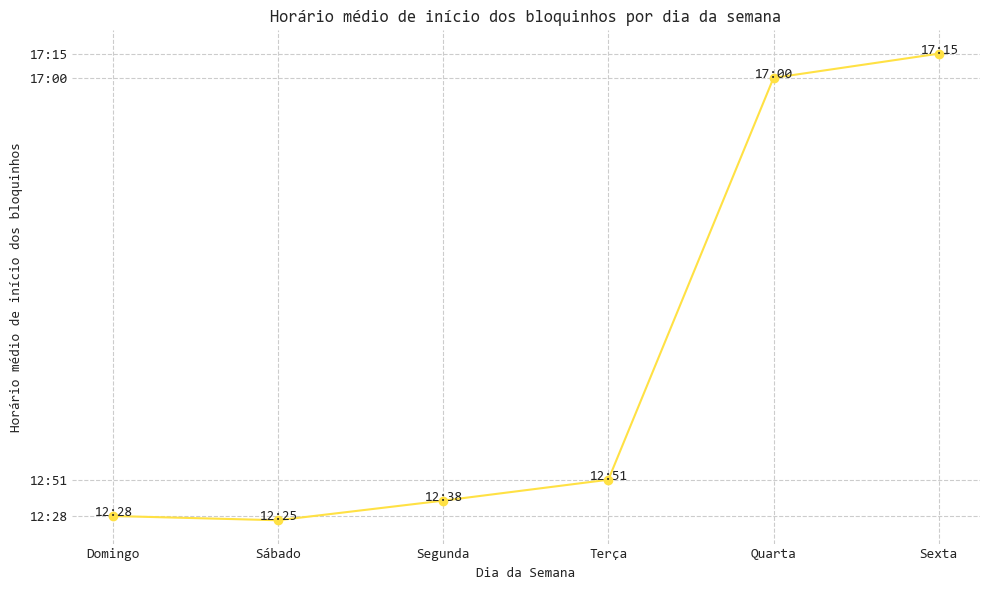

In [80]:
## Horário médio de início dos bloquinhos
# Transformando os datetime.date em segundos
def tempo_para_segundos(t):
    return t.hour * 3600 + t.minute * 60 + t.second

db['Horario em segundos'] = db['Hora'].apply(tempo_para_segundos)

# Calculando o horário médio
horario_medio = db.groupby('Dia')['Horario em segundos'].mean()
hora_media = (horario_medio.div(3600)).astype(int)
minuto_medio = (horario_medio%3600).div(60).astype(int)
segundo_medio =(horario_medio%60).astype(int)

# Eliminando a coluna do horário em segundos do dataframe original
db.drop(['Horario em segundos'], inplace = True, axis = 1)

def criar_objeto_time(hour, minute, second):
    return datetime.time(hour, minute, second)

# Transformando o horário médio em um objeto datetime.time novamente
horario_medio_dt = pd.DataFrame([criar_objeto_time(hora,minuto, segundo) for
                                 hora, minuto, segundo in
                                 zip(hora_media, minuto_medio, segundo_medio)],
                                 index = horario_medio.index,
                                 columns = ['Horario medio'])
horario_medio = pd.concat([horario_medio, horario_medio_dt], axis = 1).reset_index()


# Ordenando o dataframe pelos dias da semana
horario_medio.Dia = pd.Categorical(horario_medio.Dia, categories = list(dic_dias.values()),
                                    ordered = True)
horario_medio.sort_values('Dia', inplace = True)

# Plot do gráfico
plt.figure(figsize=(10, 6))
plt.plot(horario_medio['Dia'], horario_medio['Horario em segundos'], color = amarelo_dev, marker='o', linestyle='-')
plt.xlabel('Dia da Semana')
plt.ylabel('Horário médio de início dos bloquinhos')
plt.tick_params(axis='x', direction='in')

plt.title('Horário médio de início dos bloquinhos por dia da semana')
yticks_string = [str(t)[:5] for t in horario_medio['Horario medio']] # selecionando apenas os 5 primeiros caracteres da string para eliminar os segundos do gráfico

plt.yticks(horario_medio['Horario em segundos'].astype(int), yticks_string) # Formatando as marcações no eixo y 
yticks = plt.yticks()[0]

# Removendo as datas 12:26 e 12:35 do eixo y para torná-lo menos poluído
ticks_to_remove = [yticks[1], yticks[2]]  
new_yticks = [tick for tick in yticks if tick not in ticks_to_remove]
plt.yticks(new_yticks)

i = 0
for x,y in enumerate(horario_medio['Horario em segundos']):
    plt.annotate(yticks_string[i], xy=(x, y), ha = 'center')
    i+= 1

plt.tight_layout()
plt.show()

O horário médio de início dos bloquinhos ao longo dos dias da semana fica concentrado entre 12h30 e 13h de domingo à terça-feira e a partir das 17h nas quartas e sextas-feiras. Entretanto, esse horário médio para quartas e sextas-feiras não é muito representativo, pois como visto no primeiro gráfico nós só temos 5 observações nestes dois dias da semana. A caráter de curiosidade, podemos checar que essas 5 observações aconteceram no pré-carnaval.


In [81]:
print(pd.DataFrame(db[db['Dia'].isin(['Quarta', 'Sexta'])]['carnaval'].value_counts()).rename({'count':'Quantidade de bloquinhos'}, axis =1))
                  

              Quantidade de bloquinhos
carnaval                              
Pré-Carnaval                         5


Apesar de já sabermos o horário médio de início dos bloquinhos, vamos ver como fica a distribuição deles por horário de início com um plot de barras:

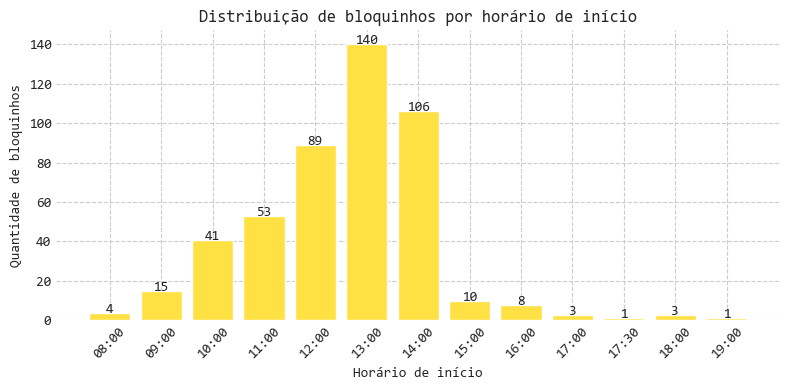

In [82]:
## Quantidade de bloquinhos por horário de início
bloquinhosHorario = pd.DataFrame(db['Hora'].value_counts()).rename({'count':'Quantidade'}, axis = 1)
bloquinhosHorario.reset_index(inplace = True)
# bloquinhosHorario = bloquinhosHorario.rename(columns={'index': 'Hora', 'Hora':'Quantidade'})
bloquinhosHorario.Hora = bloquinhosHorario.Hora.astype(str).str.slice(stop=5)
bloquinhosHorario.sort_values('Hora', inplace = True)
bar_plot(bloquinhosHorario['Hora'],
         bloquinhosHorario['Quantidade'],
         cor = amarelo_dev,#'#FF8C9D',
         x_label = 'Horário de início',
         y_label = 'Quantidade de bloquinhos',
         titulo = 'Distribuição de bloquinhos por horário de início')
for x,y in enumerate(bloquinhosHorario['Quantidade']):
    plt.annotate(y, xy=(x, y), ha = 'center')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

A maior parte dos bloquinhos começa às 13h, 14h e 12h, respectivamente. Haja protetor solar 😱. Será que essa distribuição muda muito em diferentes períodos do carnaval?

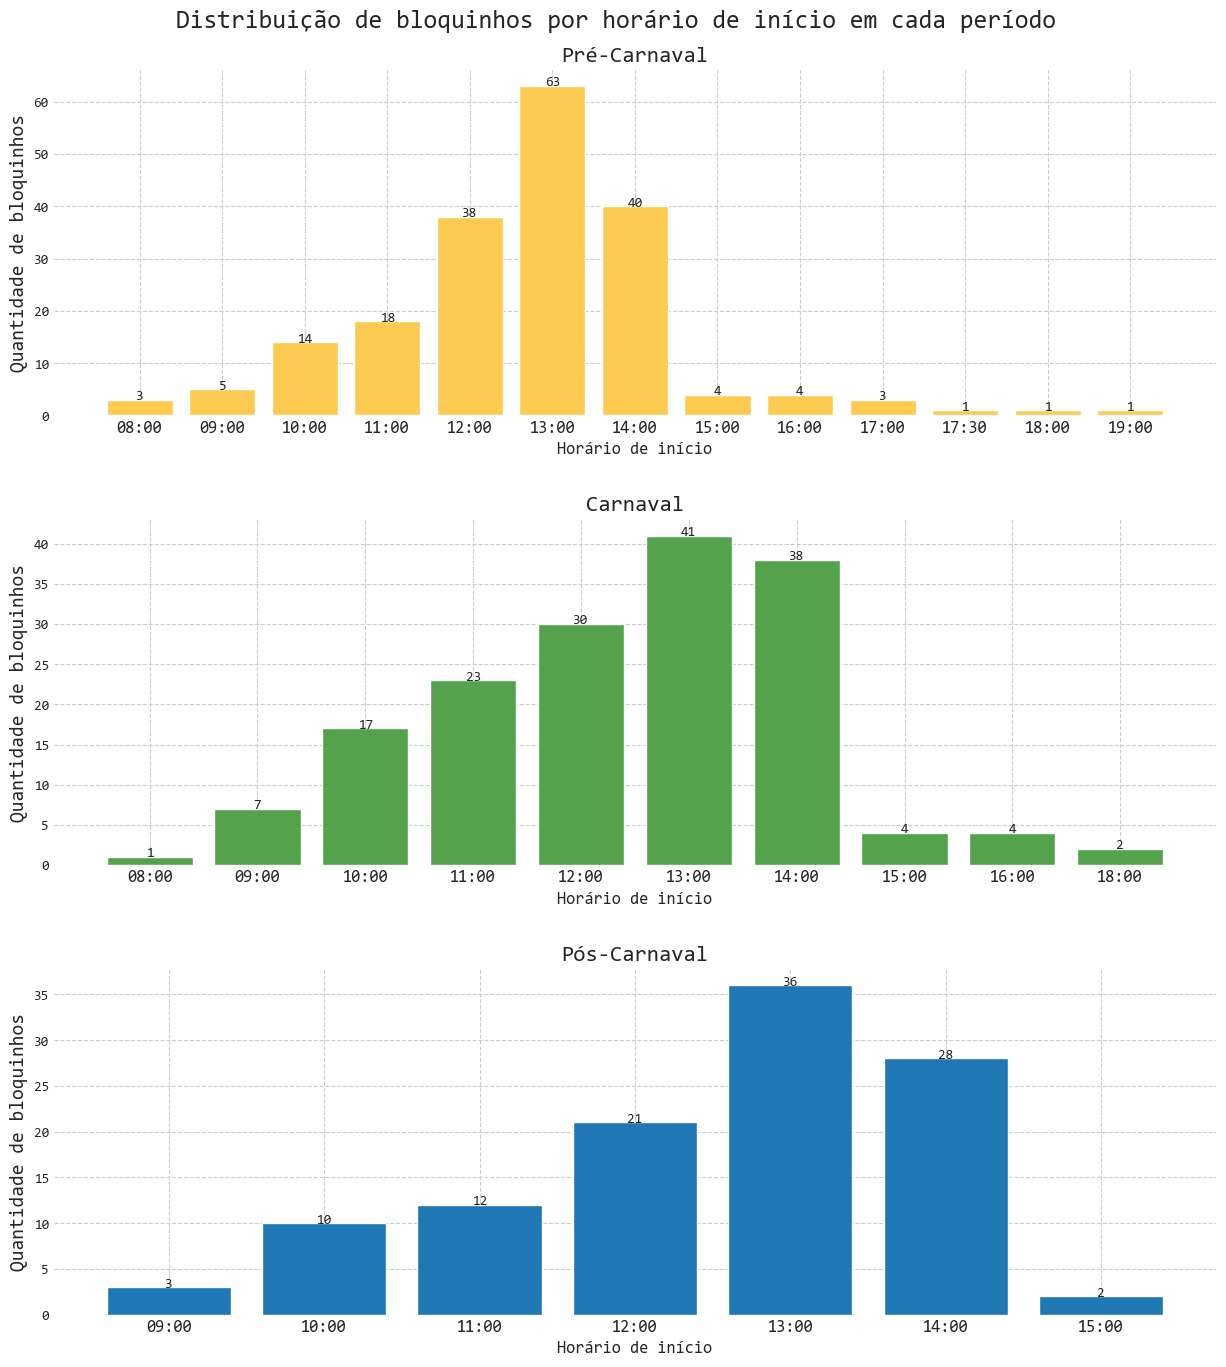

In [83]:
periodos_carnaval = ['Pré-Carnaval', 'Carnaval', 'Pós-Carnaval']
i = 0

fig, axs = plt.subplots(3,1, figsize = (15,15))
fig.suptitle('Distribuição de bloquinhos por horário de início em cada período', fontsize = 18)
for momento in periodos_carnaval:
    # Avaliação dos dados
    bloquinhosHorario = pd.DataFrame(db[db['carnaval'] == momento]['Hora'].value_counts()).rename({'count':'Quantidade'}, axis = 1)
    bloquinhosHorario.reset_index(inplace = True)
    bloquinhosHorario.Hora = bloquinhosHorario.Hora.astype(str).str.slice(stop=5)
    bloquinhosHorario.sort_values('Hora', inplace = True)

    # Plot
    axs[i].bar(bloquinhosHorario['Hora'], bloquinhosHorario['Quantidade'], color = cores[i])
    axs[i].set_title(momento, fontsize=16)
    axs[i].set_xlabel('Horário de início', fontsize=12)
    axs[i].set_ylabel('Quantidade de bloquinhos', fontsize=14)
    axs[i].tick_params(axis='x', direction='in', labelsize=12)

    for x,y in enumerate(bloquinhosHorario['Quantidade']):
        #plt.annotate(y, xy=(x, y), ha = 'center')
        axs[i].annotate(y, xy = (x,y), ha = 'center')
   
    i += 1 # para alternar entre cada plot
plt.subplots_adjust(top = 0.94, # ajuste para o título da figura não ficar muito longe dos subplots
                    hspace=0.3) # ajuste para ter espaço suficiente entre os subplots)

plt.show()


A distribuição de bloquinhos por horário não fica muito alterada ao controlarmos por um período específico do carnaval. Entretanto, é interessante que o range de horários de início diminui substancialmente no pós-carnaval. Para facilitar a análise, vamos visualizar os mesmos dados, mas agora divididos entre "manhã", "início da tarde" e "fim de tarde". Vamos definir "manhã" como os horários até 11h, "início da tarde" como 12h a 15h e "fim de tarde" como 16h+.

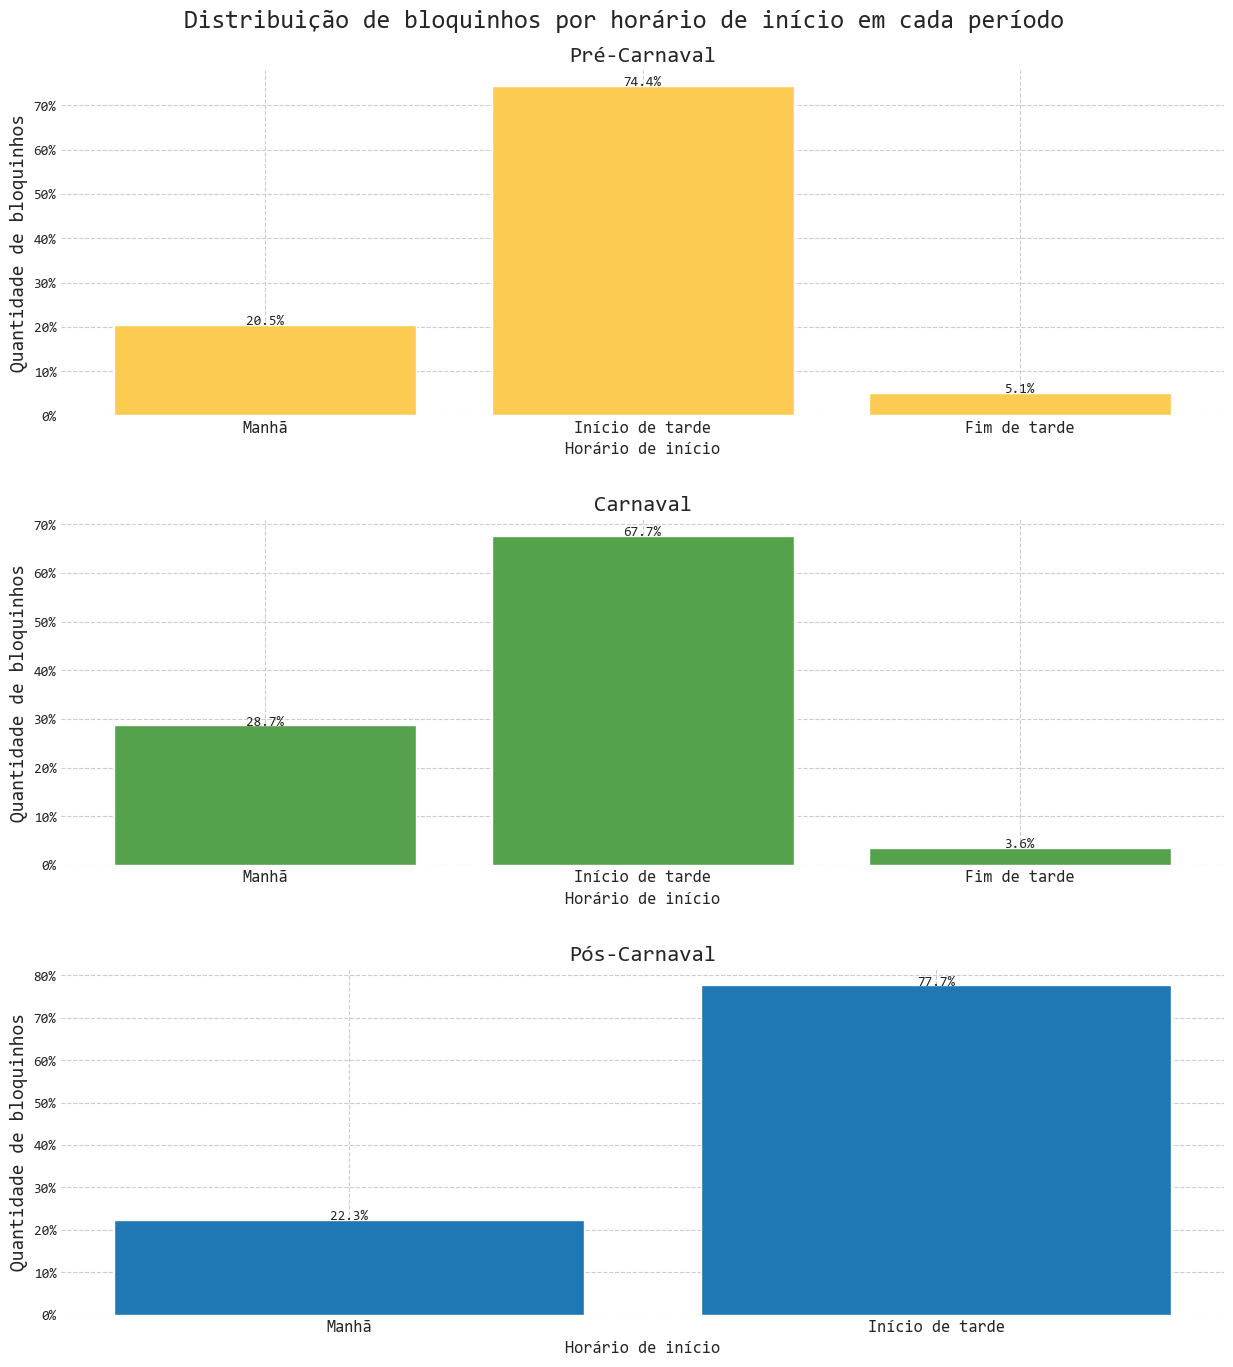

In [84]:
# Vamos criar uma coluna chamada "Grupo de horário" que classifica o horário de início em "manhã", "início de tarde" e "fim de tarde"
def hr_func(ts):
    return ts.hour

db.loc[db['Hora'].apply(hr_func) < 12, 'Grupo de horário'] = 'Manhã'
db.loc[db['Hora'].apply(hr_func).isin([12, 13, 14, 15]), 'Grupo de horário'] = 'Início de tarde'
db.loc[db['Hora'].apply(hr_func)> 15, 'Grupo de horário'] = 'Fim de tarde'

periodos_carnaval = ['Pré-Carnaval', 'Carnaval', 'Pós-Carnaval']
i = 0

## Plot
fig, axs = plt.subplots(3,1, figsize = (15,15))
fig.suptitle('Distribuição de bloquinhos por horário de início em cada período', fontsize = 18)
db['Grupo de horário']
for momento in periodos_carnaval:
    # Avaliação dos dados
    bloquinhosHorario = pd.DataFrame(db[db['carnaval'] == momento]['Grupo de horário'].value_counts()).rename({'count':'Quantidade'}, axis = 1)
    bloquinhosHorario.reset_index(inplace = True)
    bloquinhosHorario['pct'] = bloquinhosHorario['Quantidade'].div(bloquinhosHorario['Quantidade'].sum())
    
    
    bloquinhosHorario['Grupo de horário'] = pd.Categorical(bloquinhosHorario['Grupo de horário'], categories = ['Manhã', 'Início de tarde', 'Fim de tarde'], ordered = True)
    bloquinhosHorario.sort_values('Grupo de horário', inplace = True)

    # Plot
    axs[i].bar(bloquinhosHorario['Grupo de horário'], bloquinhosHorario['pct'], color = cores[i])
    axs[i].set_title(momento, fontsize=16)
    axs[i].set_xlabel('Horário de início', fontsize=12)
    axs[i].set_ylabel('Quantidade de bloquinhos', fontsize=14)
    axs[i].tick_params(axis='x', direction='in', labelsize=12)
    
    # Formatando o eixo y como %
    axs[i].yaxis.set_major_formatter(FuncFormatter(formatacao_pct))

    # Adicionando os rótulos encima das barras
    for x,y in enumerate(bloquinhosHorario['pct']):
        axs[i].annotate("{:.1%}".format(y), xy=(x, y), ha = 'center')

    i += 1 # para alternar entre cada plot
plt.subplots_adjust(top = 0.94, # ajuste para o título da figura não ficar muito longe dos subplots
                    hspace=0.3) # ajuste para ter espaço suficiente entre os subplots)

plt.show()


Também podemos avaliar quais foram os estilos musicais predominantes nesse Carnaval de 2024 a partir da coluna "Estilo musical".

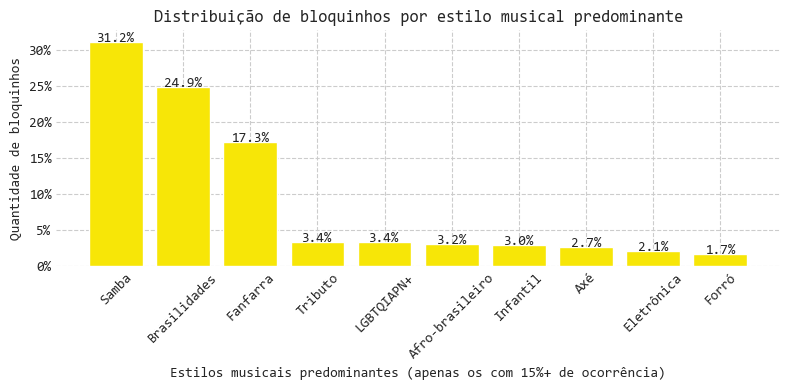

In [85]:

## Distribuição de bloquinhos por estilo musical predominante
bloquinhosEstilo = pd.DataFrame(db['Estilo Musical'].value_counts()).rename({'count':'Quantidade'},
                                                                axis = 1)
bloquinhosEstilo.reset_index(inplace = True)
# bloquinhosEstilo = bloquinhosEstilo.rename(columns={'index': 'Estilo Musical', 'Estilo Musical':'Quantidade'})
bloquinhosEstilo['pct'] = bloquinhosEstilo['Quantidade'].div(bloquinhosEstilo['Quantidade'].sum())
bloquinhosEstilo = bloquinhosEstilo[bloquinhosEstilo['pct']>0.015]
bar_plot(bloquinhosEstilo['Estilo Musical'],
         bloquinhosEstilo['pct'],
         cor = '#f7e607',
         x_label = 'Estilos musicais predominantes (apenas os com 15%+ de ocorrência)',
         y_label = 'Quantidade de bloquinhos',
         titulo = 'Distribuição de bloquinhos por estilo musical predominante')

for x,y in enumerate(bloquinhosEstilo['pct']):
    plt.annotate("{:.1%}".format(y), xy=(x, y), ha = 'center')
plt.gca().yaxis.set_major_formatter(FuncFormatter(formatacao_pct))
plt.tight_layout()  
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Pelo visto, o samba, "brasilidades" e a fanfarra foram o top 3 disparado! Vamos analisar se esse foi o caso na cidade inteira, controlando por região de São Paulo.

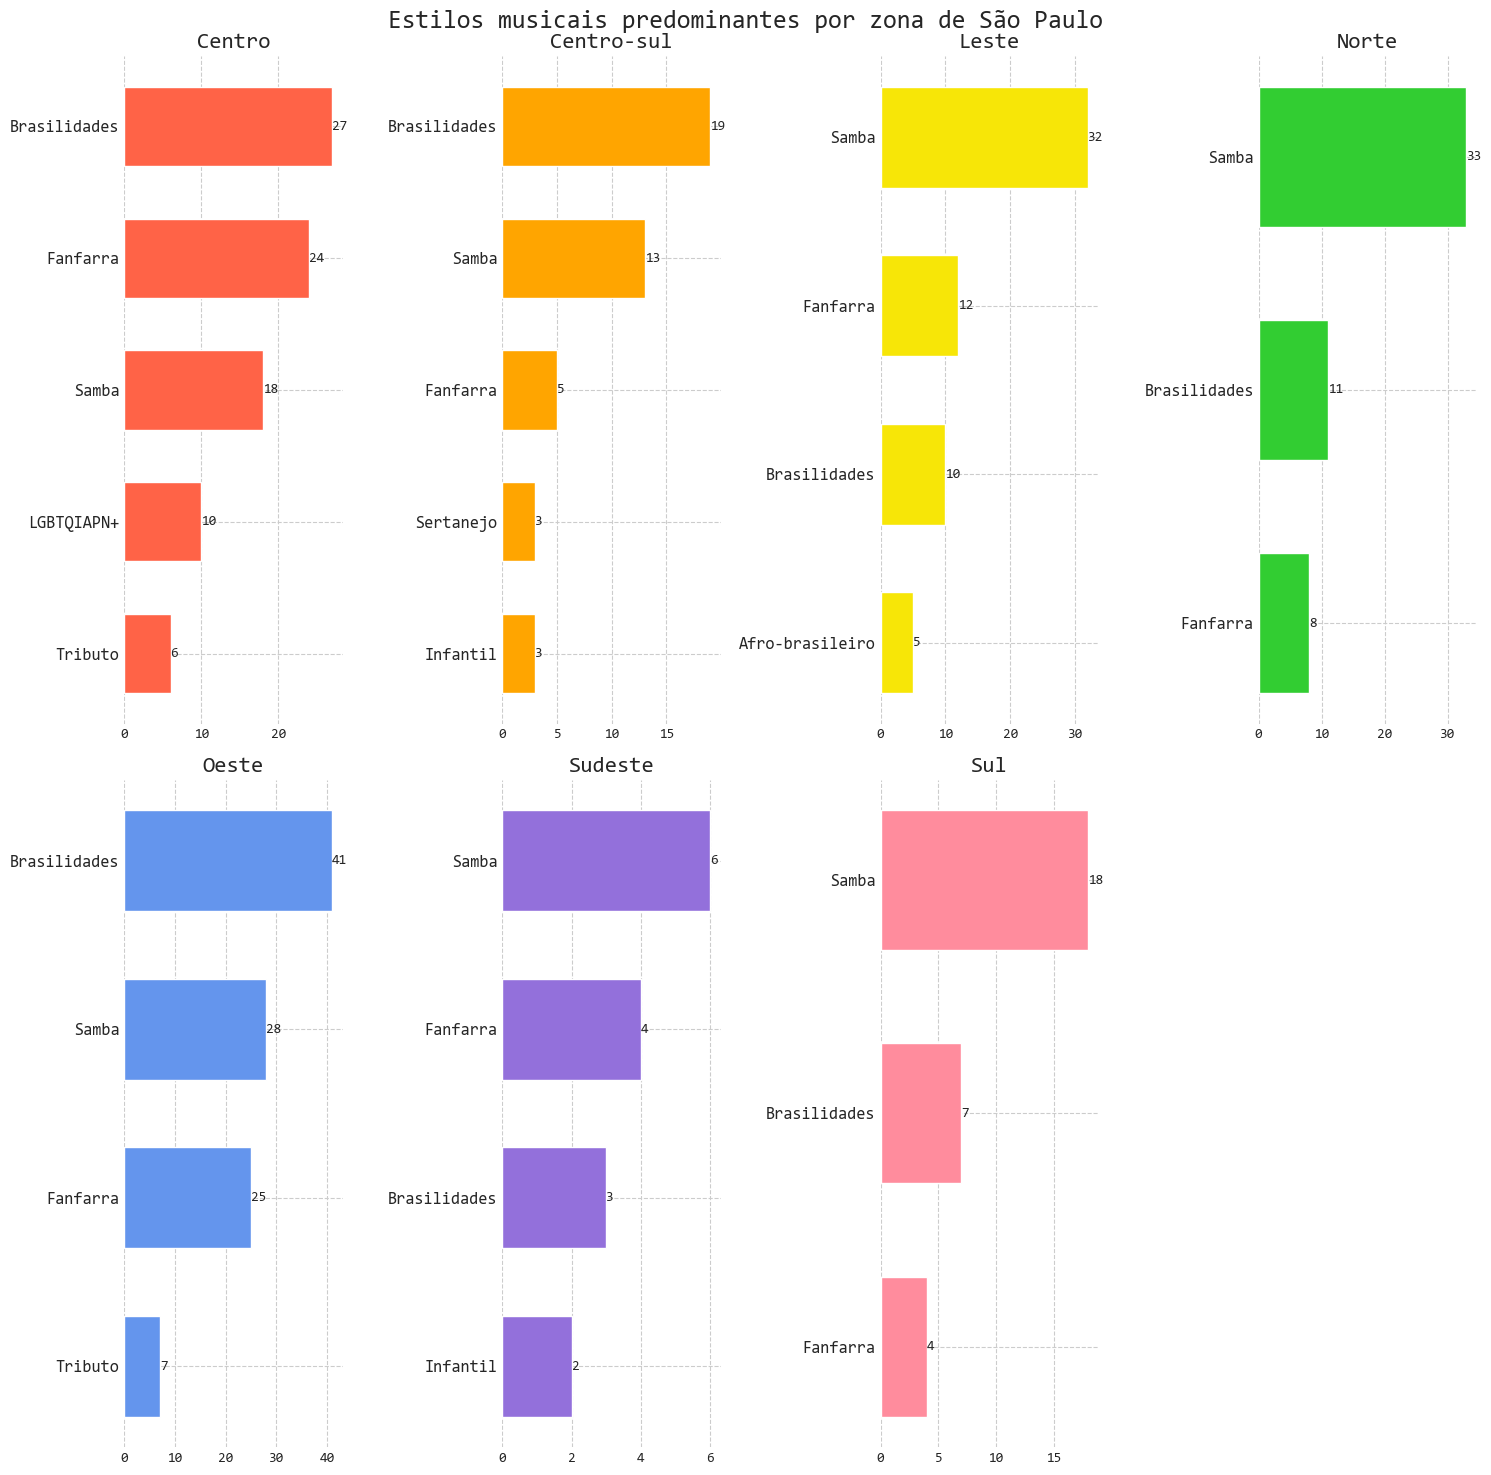

In [86]:

## Distribuição de bloquinhos por estilo musical predominante por zona
EstiloZona = pd.DataFrame(db.groupby('Zona')['Estilo Musical'].value_counts())

EstiloZona = EstiloZona.rename(columns={'count': 'Quantidade'}).reset_index()
zonas = EstiloZona['Zona'].unique()

# Configuração da figura e dos subplots
cores_zonas = {
    'Centro': '#FF6347',
    'Centro-sul': '#FFA500',
    'Leste': '#f7e607',
    'Norte': '#32CD32',
    'Oeste': '#6495ED',
    'Sudeste': '#9370DB',
    'Sul': '#FF8C9D'
}

fig, axs = plt.subplots(2, 4, figsize=(15, 15))

fig.suptitle('Estilos musicais predominantes por zona de São Paulo', fontsize= 18)
x_label = ""
#y_label = "Quantidade de bloquinhos"
y_label = ""
titulo = 'Distribuição de bloquinhos por estilo musical predominante'

rows = [0,0,0,0,1,1,1]
cols = [0,1,2,3,0,1,2]
# Iteração para plotar cada zona
for i, zona in enumerate(zonas):
    row, col = rows[i], cols[i]
    
    # Filtrando os dados para a zona atual
    dados_zona = EstiloZona[EstiloZona['Zona'] == zona].copy()
    dados_zona.loc[:,'pct'] = dados_zona['Quantidade'].div(dados_zona["Quantidade"].sum())
    dados_zona = dados_zona[dados_zona['pct'] > 0.05]  # Pegando só estilos com 2%+ de frequencia
    dados_zona = dados_zona.sort_values('Quantidade')
    
    # Plotando o bar plots correspondentes com a cor da zona
    axs[row, col].barh(dados_zona['Estilo Musical'], dados_zona['Quantidade'], height=0.6, color=cores_zonas[zona])
    for y, x in enumerate(dados_zona['Quantidade']):
        axs[row, col].annotate(str(x), xy=(x, y), va='center')
    
    axs[row, col].set_title(zona, fontsize=16)
    axs[row, col].set_xlabel(x_label, fontsize=12)
    axs[row, col].set_ylabel(y_label, fontsize=14)
    axs[row, col].tick_params(axis='y', direction='in', labelsize=12)

# Removendo os subplots não usados
fig.delaxes(axs[1,3])

plt.tight_layout()
plt.show()

De fato, não parece haver uma heterogeneidade muito grande em termos de preferências por estilo musical :)! 

Por fim, vamos aproveitar que temos as coordenadas geográficas do ponto de partida dos bloquinhos para usar a biblioteca folium, que permite criar mapas interativos para visualizar dados geoespaciais. Para isso, usamos como base um arquivo .json disponível na internet com a delimitação dos municípios do estado de São Paulo, e plotamos sobre esse mapa pontos referentes a cada um dos bloquinhos na nossa database.

In [87]:

## Localização dos bloquinhos no mapa
# Abrindo o arquivo com os munícipios de SP delimitados
file2read = path + r'\municipios_sp.json'
with open(file2read, encoding="utf8") as f:
    geo_json_data = json.load(f)

# Criando o mapa e especificando a parte visual
localizacao = [float(db.iloc[0,5]), float(db.iloc[0,6])]
mapa = folium.Map(
    width=600,height=400,
    location= localizacao, 
    zoom_start=11
)
folium.GeoJson(
    geo_json_data,
    style_function=lambda feature: {
        'fillColor': 'white',
        'color': 'black',
        'weight': 1,
    }
).add_to(mapa)

# Plotando a localização de cada bloquinho
cores_disponiveis = ['#6495ED', '#32CD32', '#FF6347', '#FFA500', '#9370DB', '#FFC0CB', '#FFFF00']
cor_marcadores = 'darkblue'
for index, row in db.iterrows():
    cor_marcador = random.choice(cores_disponiveis) # Escolhendo uma cor aleatória para cada bloquinho
    folium.CircleMarker([float(row['Latitude']), float(row['Longitude'])], # plot de um ponto para cada bloquinho
                        # especificações de design
                        fill=True, radius=2, weight = 2.5, color= cor_marcador, fill_color=cor_marcador).add_to(mapa)
    
# Salvando o arquivo do mapa
mapa.save('mapa_bloquinhos_SP.html')
print("Mapa salvo!")

Mapa salvo!


Para visualizar o mapa, basta abrir o arquivo .html criado!

## Obrigada!

Essa foi a análise :). Espero que você tenha gostado! Se você gostou, imagino que irá gostar ainda mais do [perfil do FEA.dev no Instagram!](https://www.instagram.com/fea.dev/). Estamos sempre disponíveis para contato. Obrigada!